In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import src.names_numbers as NN
from src.names_numbers import heroes as H 

%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from src.roc import plot_roc
from sklearn.metrics import confusion_matrix, mean_squared_error
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('data/dota2Train.csv', header=None)
#df.head()

In [4]:
df.rename(columns={0: 'winner',
                   1: 'region',
                   2: 'mode',
                   3: 'type'}, inplace=True)
#df.head()

In [5]:
df.columns = [(i-3) if type(i) == int else i for i in df.columns]

In [6]:
#NN.get_names(df)

In [7]:
#df.head()

In [8]:
#NN.get_nums(df)

In [9]:
#df.head()

In [10]:
#start random forest work need binary
# winner column 0 = team B wins,  1 = team A
rfdf = df.copy()
for i in ['region', 'mode', 'type']:
    rfdf.pop(i)
winner = rfdf.pop('winner')
y = winner.replace(-1, 0)
#make X values binary, each column is char-team, 1 denotes picked.
X = rfdf
X2 = X.copy()
X.columns = [(str(i) + 'A') for i in X.columns]
X2.columns = [(str(i) + 'B') for i in X2.columns]
X.replace(-1, 0, inplace=True)
X2.replace(1, 0, inplace=True)
X2.replace(-1, 1, inplace=True)
X = pd.concat([X, X2], axis=1)
X.shape

(92650, 226)

In [11]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)
# print("\nscore:", rf.score(X_test, y_test))
# y_predict = rf.predict(X_test)
# print("\nconfusion matrix:")
# print(confusion_matrix(y_test, y_predict))
# print("\nprecision:", precision_score(y_test, y_predict))
# print("    recall:", recall_score(y_test, y_predict))

In [12]:
# trf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#                        max_depth=None, max_features='sqrt', max_leaf_nodes=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=4, min_samples_split=2,
#                        min_weight_fraction_leaf=0.0, n_estimators=300,
#                        n_jobs=None, oob_score=False, random_state=1, verbose=0,
#                        warm_start=False)
# trf.fit(X_train, y_train)
# print("\nscore:", trf.score(X_test, y_test))
# y_predict = trf.predict(X_test)
# print("\nconfusion matrix:")
# print(confusion_matrix(y_test, y_predict))
# print("\nprecision:", precision_score(y_test, y_predict))
# print("    recall:", recall_score(y_test, y_predict))

In [13]:
# present = pd.DataFrame([np.zeros(len(X.columns))], columns=X.columns)
# teamA = ['enchantress','oracle','leshrac','bane','beastmaster']
# teamB = ['mirana','phantom_assassin','pudge','legion_commander','juggernaut']
# for hero in teamA:
#     col = str(NN.get_id(hero)) + 'A'
#     present[col] = 1.0
# for hero in teamB:
#     col = str(NN.get_id(hero)) + 'B'
#     present[col] = 1.0
# rf.predict(present)

In [14]:
#names

In [ ]:
rf.predict(present)

In [ ]:
# random_forest_grid = {'criterion':['entropy'],
#                       'max_depth': [None, 3, 10],
#                       'max_features': ['sqrt', 'log2', None],
#                       'min_samples_split': [2,4],
#                       'min_samples_leaf': [1,2,4,10],
#                       'bootstrap': [True, False],
#                       'n_estimators': [10, 20, 40, 80, 150, 200, 300],
#                       'random_state': [1]}

# rf_gridsearch = cv.GridSearchCV(RandomForestClassifier(),
#                              random_forest_grid,
#                              n_jobs=-1,
#                              verbose=True,
#                              scoring='neg_log_loss',
#                              cv=5)
# rf_gridsearch.fit(X_train, y_train)
# print("best parameters:        ", rf_gridsearch.best_params_)

# rf_best_estimator = rf_gridsearch.best_estimator_
# print('best estimator:         ', rf_best_estimator)

### XGB work

In [ ]:
#XGB testing
#import xgboost as xgb

In [ ]:
# y = digits['target']
# X = digits['data']
# kf = KFold(n_splits=2, shuffle=True, random_state=rng)
# for train_index, test_index in kf.split(X):
#     xgb_model = xgb.XGBClassifier().fit(X[train_index], y[train_index])
#     predictions = xgb_model.predict(X[test_index])
#     actuals = y[test_index]
#     print(confusion_matrix(actuals, predictions))

In [ ]:
#X.reset_index(inplace=True)
# kf = KFold(n_splits=2, shuffle=True)
# for train_index, test_index in kf.split(X[:20]):
#     xgb_model = xgb.XGBClassifier().fit(X[train_index], y[train_index])
#     predictions = xgb_model.predict(X[test_index])
#     actuals = y[test_index]
#     print(confusion_matrix(actuals, predictions))
#     break

## grphing

In [16]:
hero_pick_dict = {}
for column in X.columns:
    picks = X[column].sum()
    name = NN.get_name(column)[0]
    if name not in hero_pick_dict:
        hero_pick_dict[name] = 0
    hero_pick_dict[name] += picks

lst_of_picks = list(hero_pick_dict.items())
lst_of_picks.sort(key=lambda x: x[1], reverse=True)

In [17]:
print(lst_of_picks[-1:-10:-1])

[('abyssal_underlord', 0), ('wraith_king', 0), ('chen', 790), ('visage', 888), ('brewmaster', 1558), ('lone_druid', 1575), ('wisp', 1592), ('arc_warden', 1791), ('broodmother', 1960)]


In [18]:
print(lst_of_picks[:10])

[('mirana', 32048), ('phantom_assassin', 29802), ('pudge', 28285), ('legion_commander', 26521), ('juggernaut', 23327), ('slark', 23125), ('drow_ranger', 21700), ('invoker', 21262), ('axe', 20264), ('riki', 19670)]


In [19]:
names = [i[0] for i in lst_of_picks]
picks = [i[1] for i in lst_of_picks]

In [20]:
hero_id_dict = {hero['id']: (hero['name'], hero['localized_name'])for hero in H}
hero_name_dict = {hero['name']: hero['id'] for hero in H}
local_names = [i[1] for i in hero_id_dict.values()]

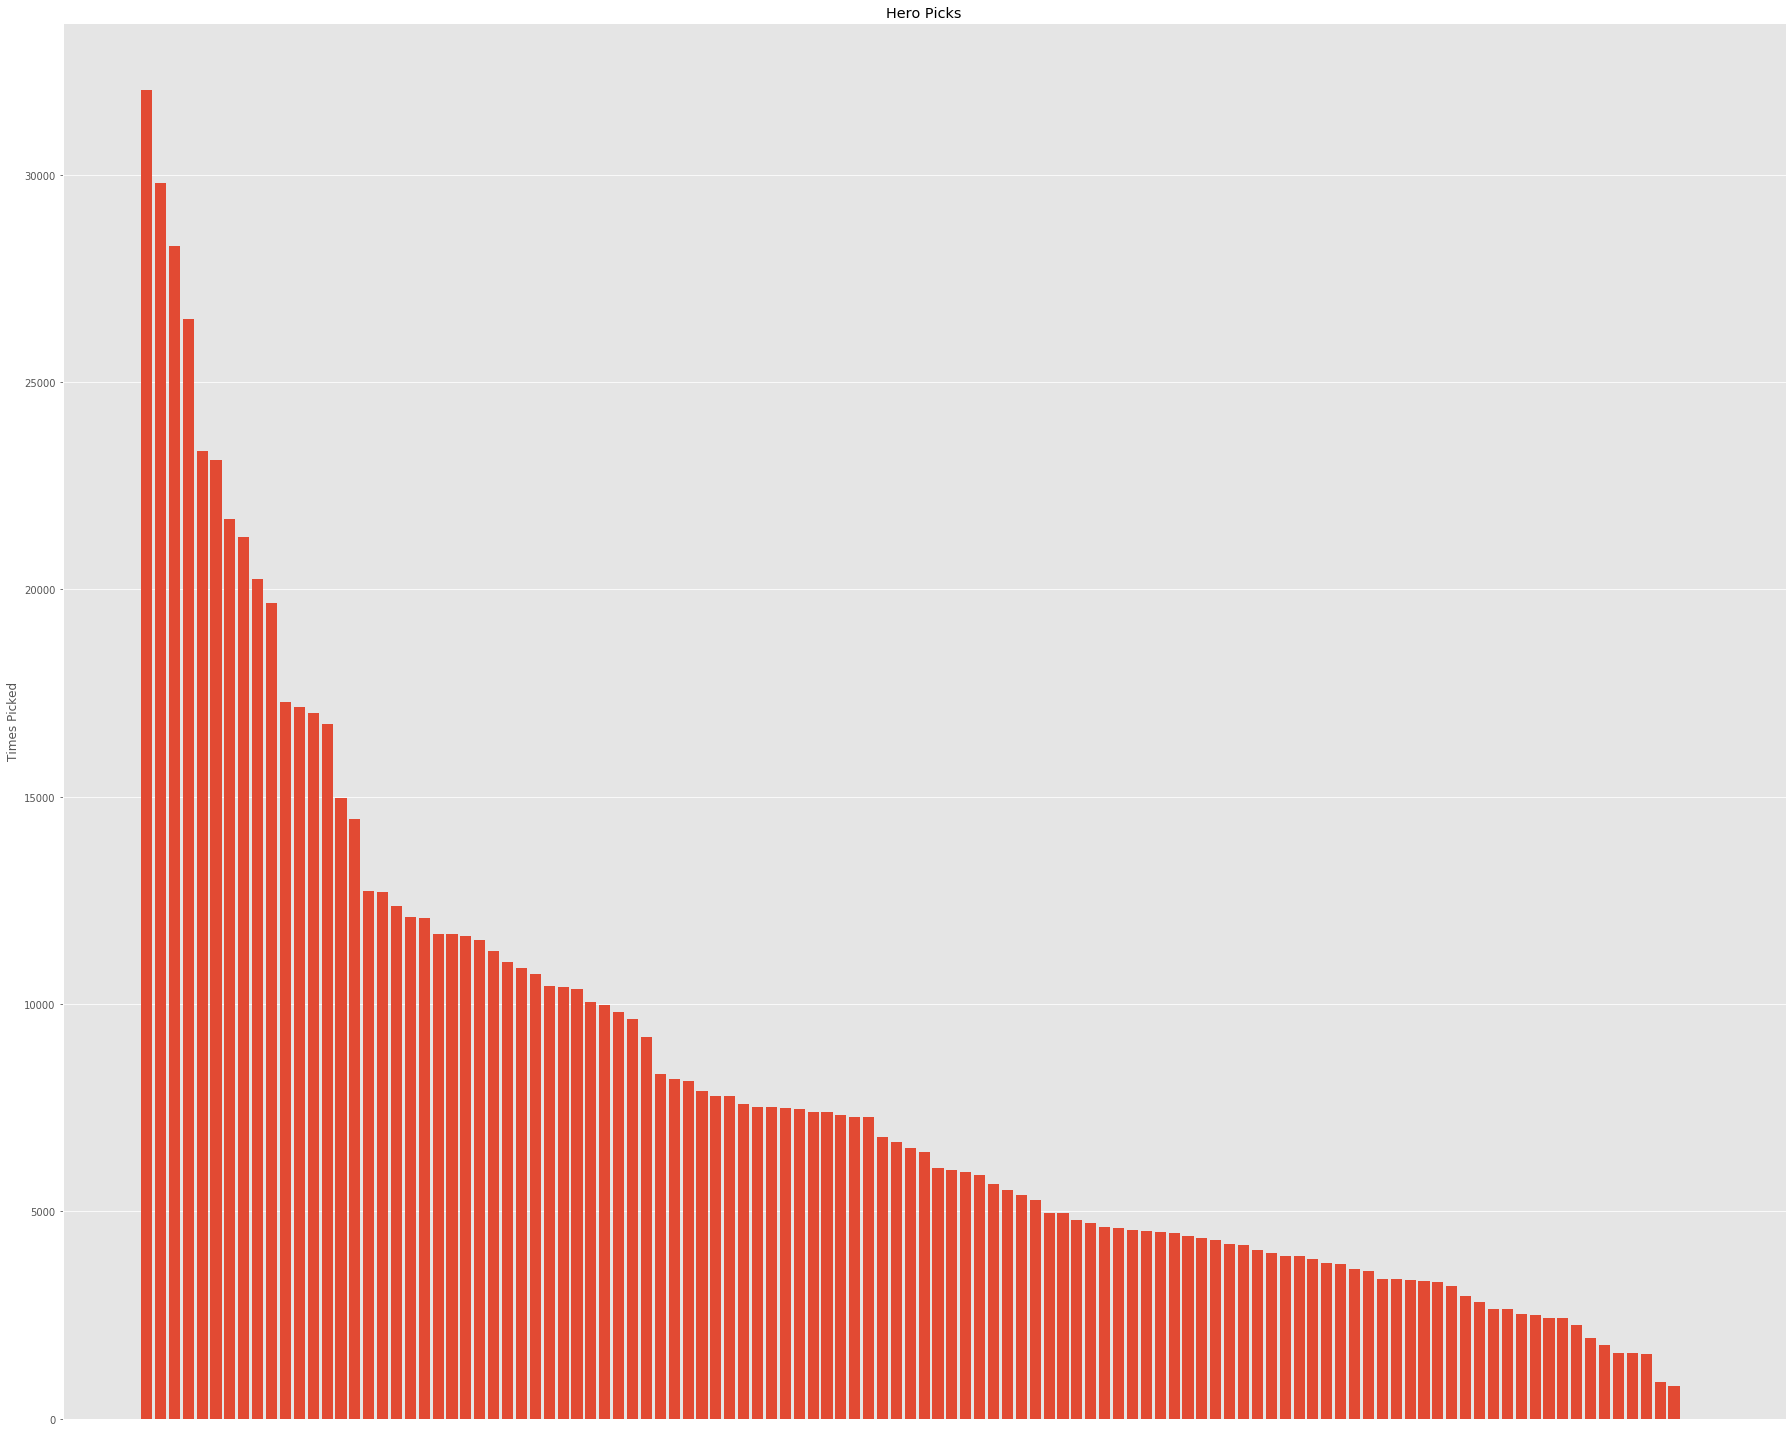

In [21]:
fig, ax = plt.subplots(figsize=(25,20))
ax.bar(np.arange(len(names)), picks)
ax.set_title('Hero Picks')
ax.set_ylabel('Times Picked')
ax.get_xaxis().set_visible(False)
fig.tight_layout()

In [22]:
wdf = X.copy()

In [23]:
wdf['winner'] = y

In [24]:
top_10 = names[:10]
def hero_wins(name):
    hero_id = hero_name_dict[name]
    col_1 = str(hero_id)+'A'
    team_a_win_df = wdf[(wdf[col_1] == 1) & (wdf['winner'] == 1)]
    col_2 = str(hero_id)+'B'
    team_b_win_df = wdf[(wdf[col_2] == 1) & (wdf['winner'] == 0)]
    comb = team_a_win_df.count(axis=0)[col_1] + team_b_win_df.count(axis=0)[col_2]
    return comb


In [25]:
wins = [hero_wins(i) for i in names]

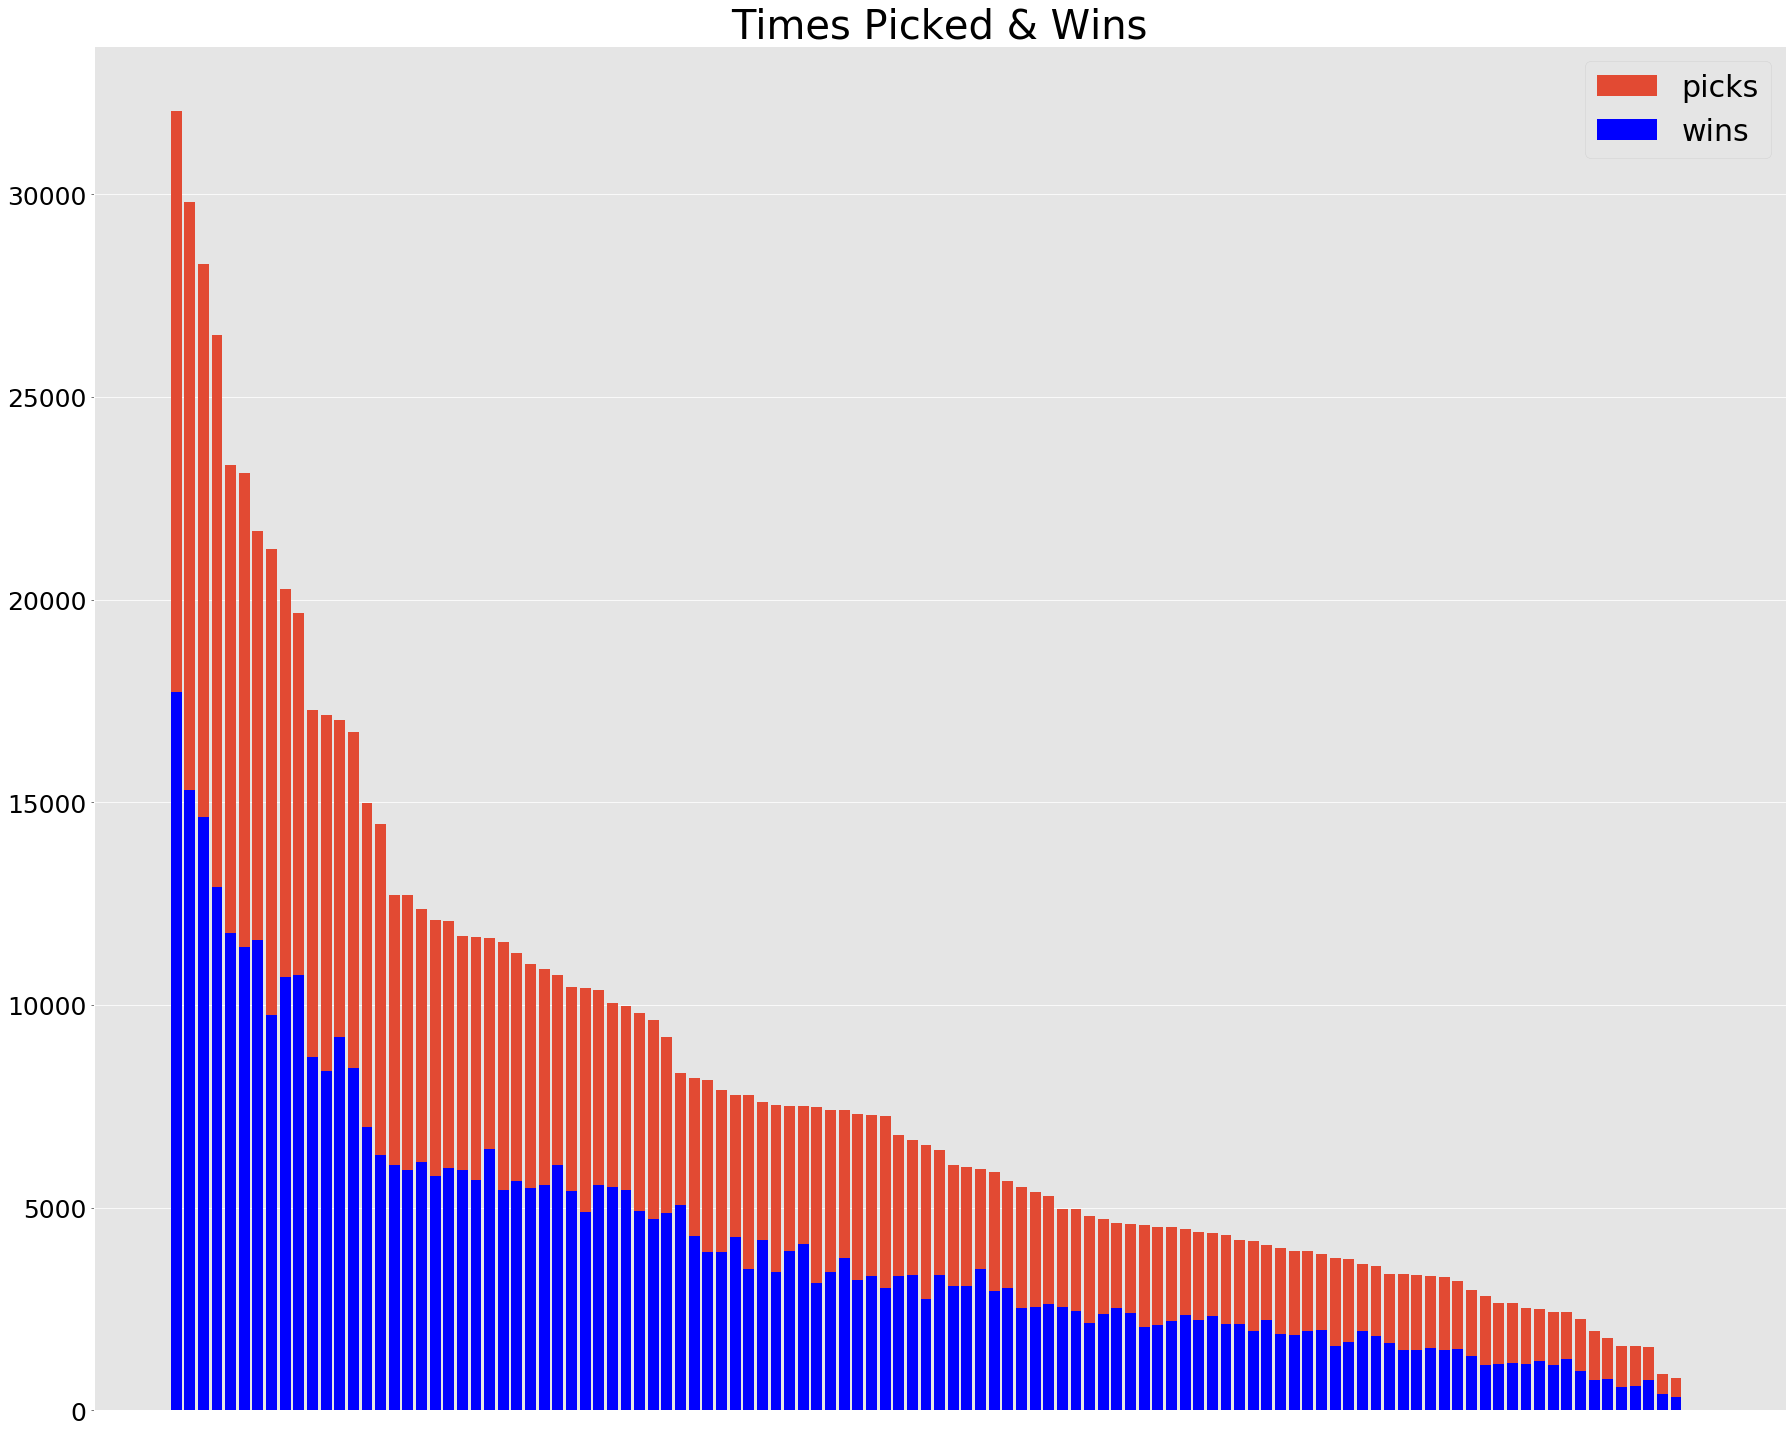

In [26]:
fig, ax = plt.subplots(figsize=(25,20))
ax.bar(np.arange(len(names)), picks, label='picks')
ax.bar(np.arange(len(names)), wins, color='blue', label='wins')
ax.set_title('Times Picked & Wins', fontdict={'fontsize': 40, 'fontweight': 7})
ax.legend(fontsize=30)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', labelsize=25, labelcolor='black')
fig.tight_layout()
#fig.savefig('graphs/picksNwins.png')


In [27]:
ratio = np.array(wins) / np.array(picks)

/home/rick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


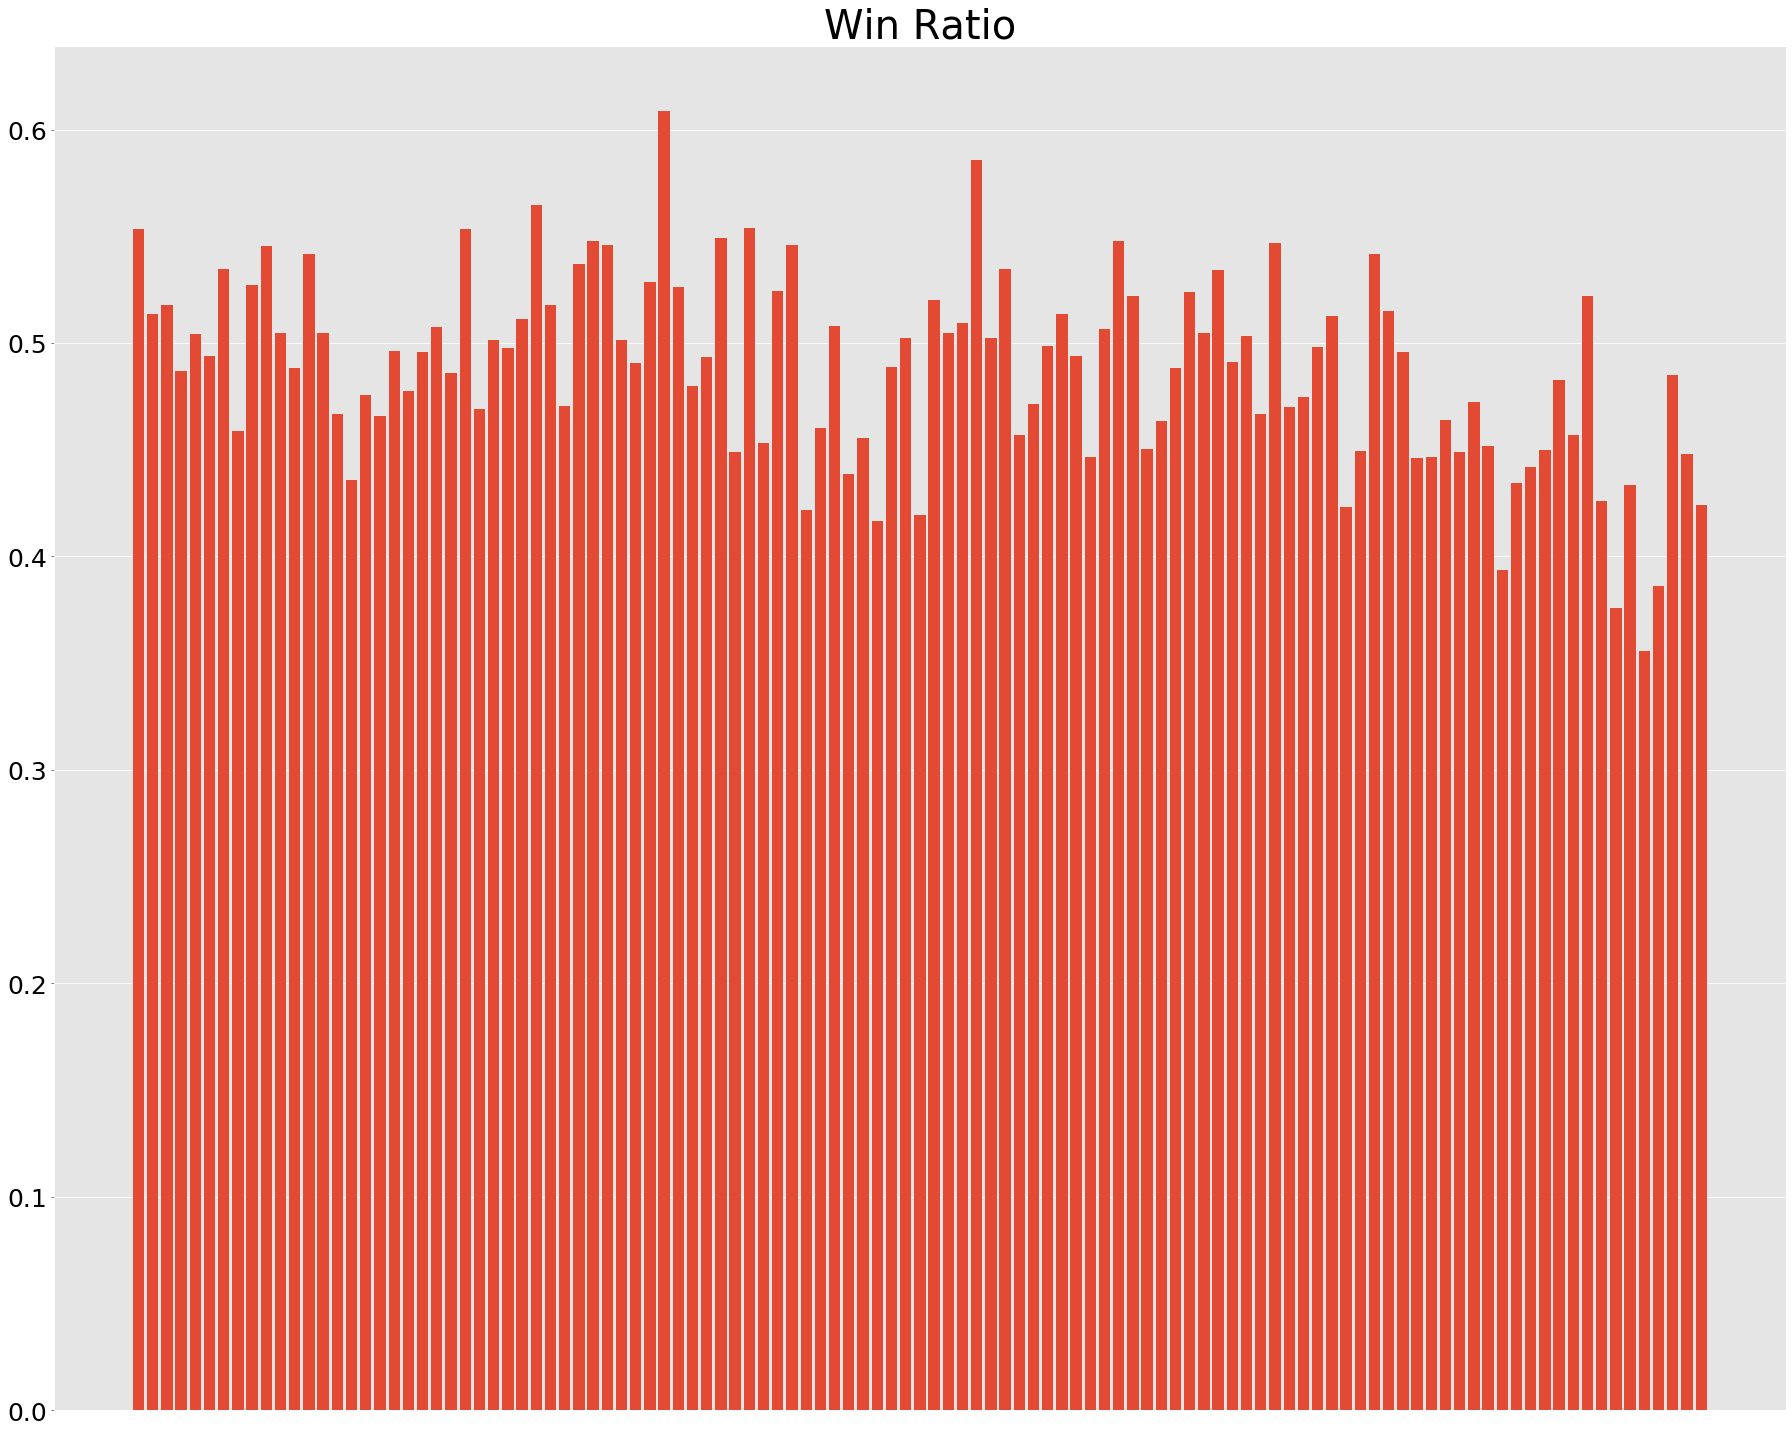

In [28]:
fig, ax = plt.subplots(figsize=(25,20))
ax.bar(np.arange(len(names)), ratio, label='picks')
ax.set_title('Win Ratio', fontdict={'fontsize': 40, 'fontweight': 7})
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', labelsize=25, labelcolor='black')
fig.tight_layout()
#fig.savefig('graphs/ratio.png')

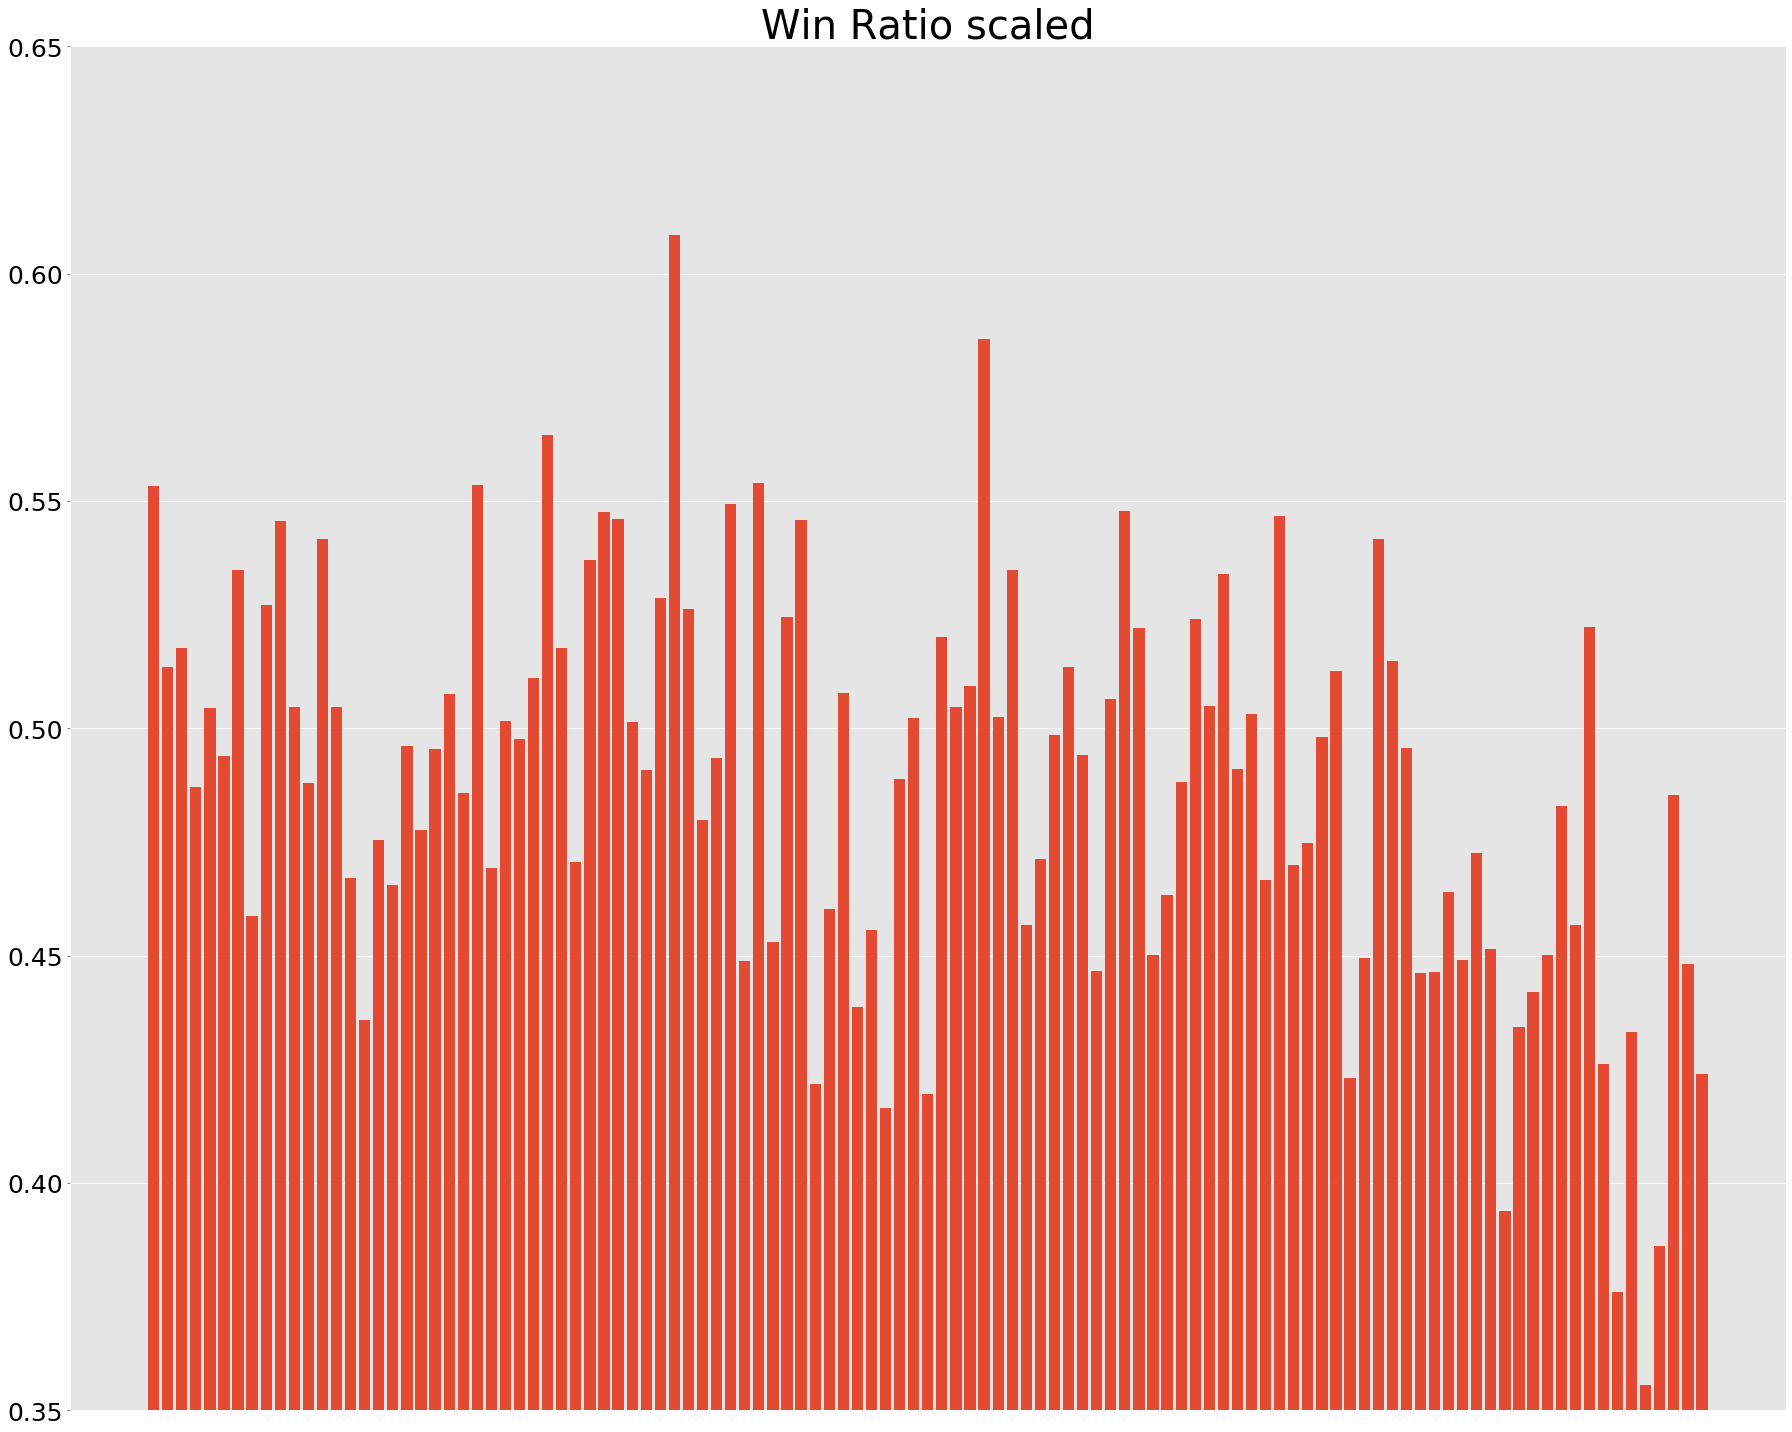

In [40]:
fig, ax = plt.subplots(figsize=(25,20))
ax.bar(np.arange(len(names)), ratio)
ax.set_title('Win Ratio scaled', fontdict={'fontsize': 40, 'fontweight': 7})
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', labelsize=25, labelcolor='black')
ax.set_ylim((.35, .65))
#ax.set_ybound((3.0, 6.5))
fig.tight_layout()
#fig.savefig('graphs/ratio-scaled.png')

In [30]:
ratio

array([0.55320145, 0.51345547, 0.51758883, 0.48712341, 0.50439405,
       0.49392432, 0.53474654, 0.45879974, 0.52704303, 0.54550076,
       0.50474647, 0.48807928, 0.54154677, 0.50477726, 0.46697389,
       0.43584606, 0.47550523, 0.46564885, 0.49615727, 0.47753551,
       0.49556716, 0.50752008, 0.4857974 , 0.55347639, 0.46919882,
       0.50159631, 0.49759375, 0.51112337, 0.56445149, 0.5177529 ,
       0.47050913, 0.53713349, 0.54766169, 0.54594703, 0.50147854,
       0.49081474, 0.52858228, 0.60853365, 0.52625794, 0.47980356,
       0.4935394 , 0.54935733, 0.44883003, 0.55387449, 0.45306068,
       0.52455743, 0.54583   , 0.42170771, 0.46018893, 0.50783572,
       0.43872114, 0.45568057, 0.41642592, 0.48889869, 0.50224888,
       0.41954726, 0.52008095, 0.50462046, 0.50940883, 0.58566874,
       0.50247061, 0.5347603 , 0.45669148, 0.47124304, 0.498486  ,
       0.51339376, 0.49414851, 0.44661811, 0.50647146, 0.54771694,
       0.52203169, 0.45014245, 0.46338774, 0.48814536, 0.52399

In [31]:
lst_of_picks_by_id = [(NN.get_id(i[0]),i[1]) for i in lst_of_picks]

In [32]:
lst_of_picks_by_id.sort(key=lambda x: x[0], reverse=True)

In [33]:
NN.get_name(str(lst_of_picks_by_id[0][0])+'a')

('arc_warden', 'Arc Warden')

In [52]:
hero_ratio = [(NN.get_name(str(i[0])+'a')[1], chrono_ratio[indx]) for indx, i in enumerate(lst_of_picks_by_id)]
hero_ratio
hero_ratio_byratio = sorted(hero_ratio, key=lambda x: x[1], reverse=True)

In [61]:
hero_ratio_byratio[-1:-10:-1]


[("Nature's Prophet", 0.4164259182831201),
 ('Queen of Pain', 0.41954726215968186),
 ('Windranger', 0.43584605817729566),
 ('Lina', 0.43872113676731794),
 ('Leshrac', 0.44195751138088013),
 ('Templar Assassin', 0.4466181061394381),
 ('Tiny', 0.44883003342761635),
 ('Bane', 0.4500792393026941),
 ('Puck', 0.45014245014245013)]

In [63]:
chrono_ratio

AxisError: axis 3 is out of bounds for array of dimension 1

/home/rick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


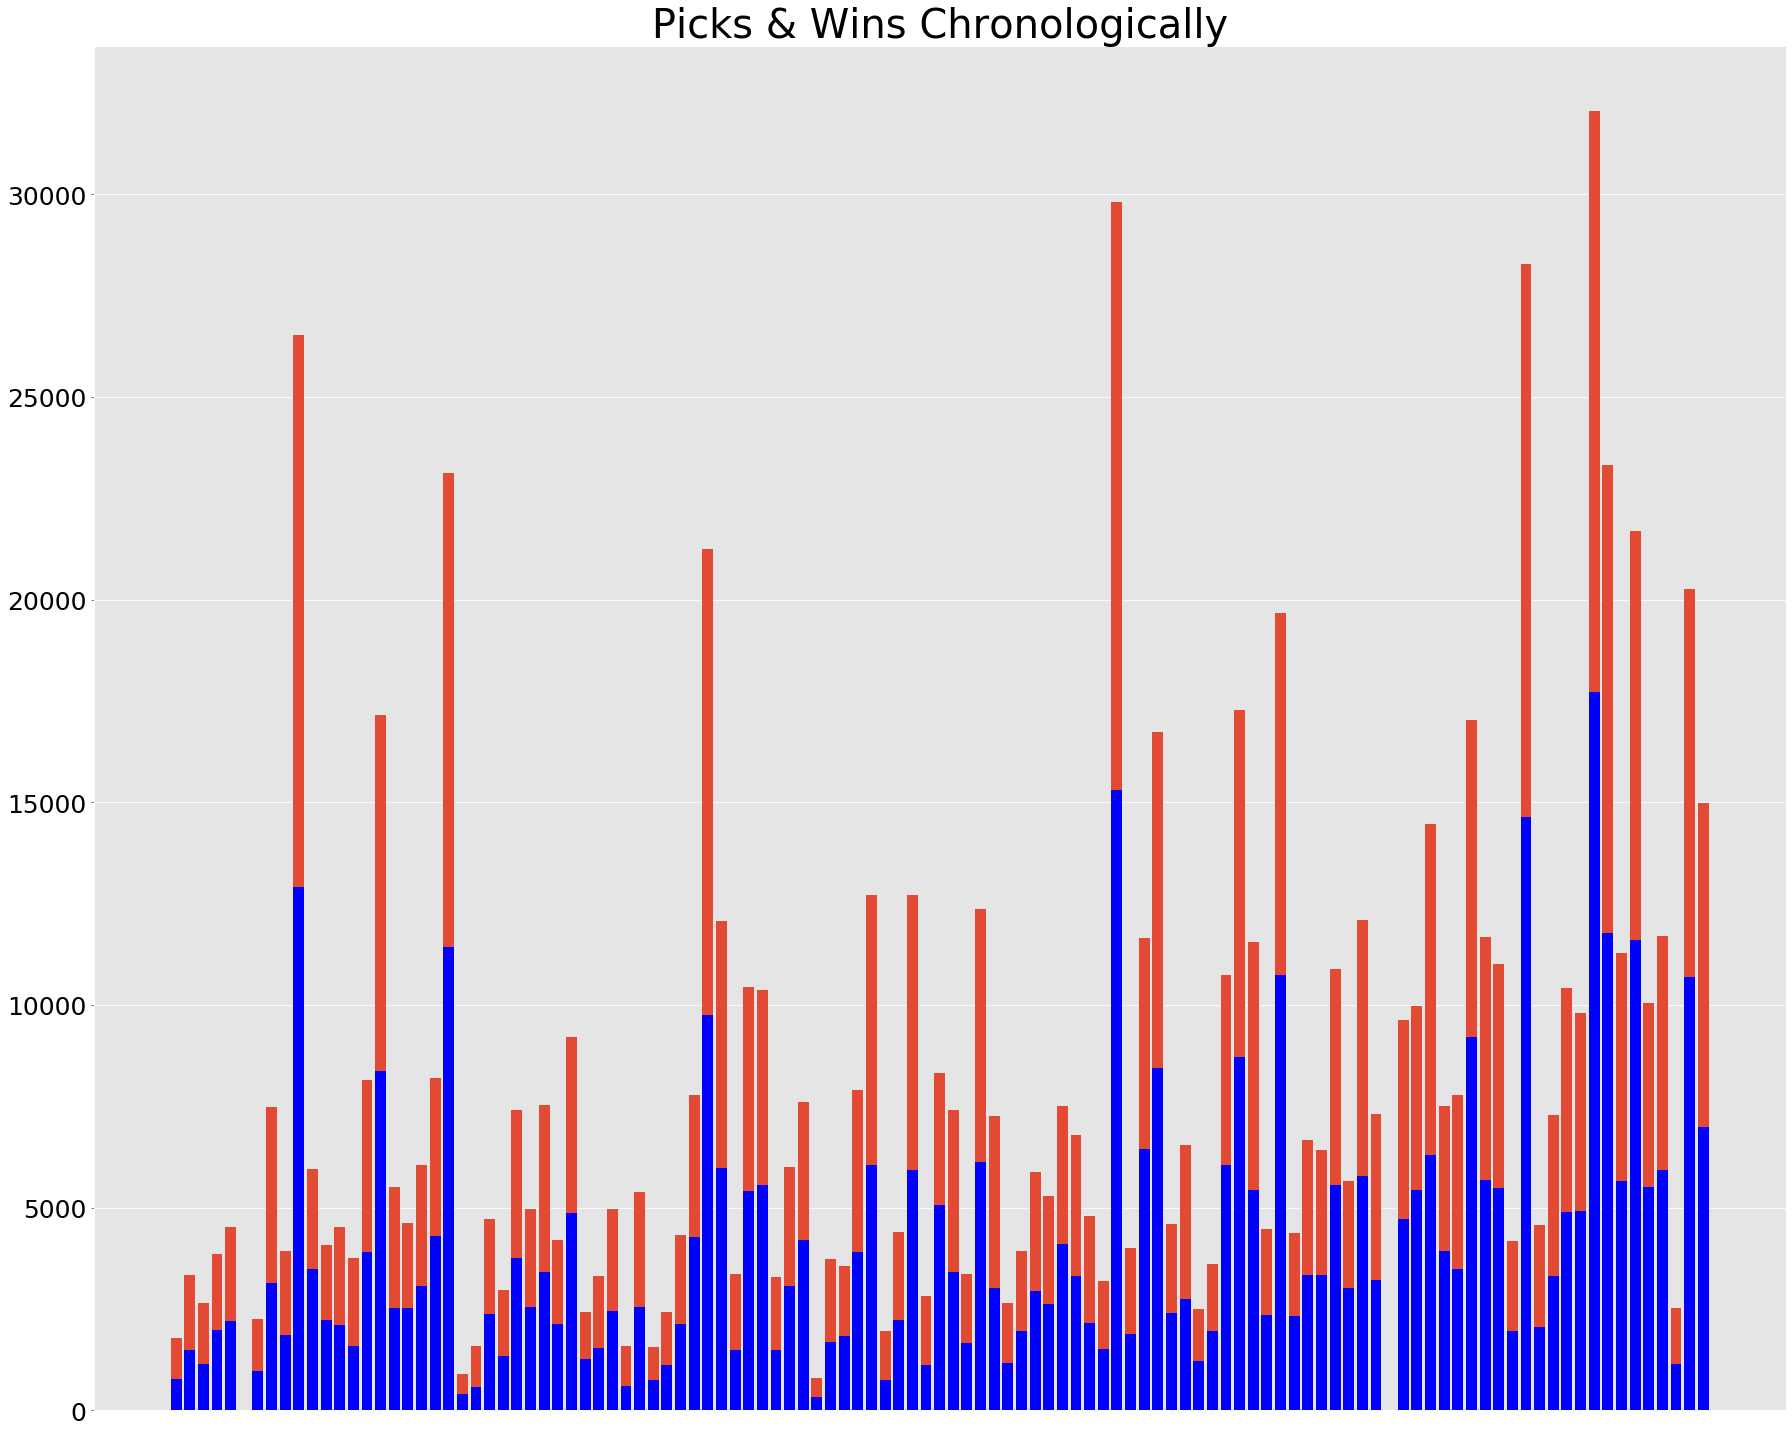

In [45]:
chrono_picks = [i[1] for i in lst_of_picks_by_id]
chrono_wins = [hero_wins(NN.get_name(str(i[0])+'a')[0]) for i in lst_of_picks_by_id]
chrono_ratio = np.array(chrono_wins) / np.array(chrono_picks)
fig, ax = plt.subplots(figsize=(25,20))
ax.set_title('Picks & Wins Chronologically', fontdict={'fontsize': 40, 'fontweight': 7})
#ax.bar(np.arange(len(chrono_picks)), chrono_ratio)
ax.bar(np.arange(len(chrono_picks)), chrono_picks)
ax.bar(np.arange(len(chrono_picks)), chrono_wins, color='blue')
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', labelsize=25, labelcolor='black')
fig.tight_layout()
fig.savefig('graphs/pickNwin-chrono.png')

In [35]:
# plot_roc(X, y, RandomForestClassifier, 'Random_Forest', bootstrap=True, class_weight=None, criterion='gini',
#                        max_depth=None, max_features='sqrt', max_leaf_nodes=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=4, min_samples_split=2,
#                        min_weight_fraction_leaf=0.0, n_estimators=300,
#                        n_jobs=None, oob_score=False, random_state=1, verbose=0,
#                        warm_start=False)

In [47]:
names[:5]

['mirana', 'phantom_assassin', 'pudge', 'legion_commander', 'juggernaut']